<a href="https://colab.research.google.com/github/farhan1503001/Investigating-Netflix-Movies-and-Guest-Stars-in-The-Office/blob/main/Product_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data From File

In [343]:
dataset=pd.read_csv('Products.csv')

In [344]:
print(dataset.head(50))

    Product Id Weight (kg) Length (m) Width (m) Height (m)
0        44331       1.025     0.2286    0.1524     0.0508
1        44352       0.504       0.14      0.04       0.16
2        44373       0.488      0.105     0.105      0.075
3        44394      1.0028       0.11      0.11       0.15
4        44415        0.55       0.13      0.13       0.11
5        44436       0.045       0.08      0.08       0.26
6        44457       0.224       0.15      0.13       0.03
7        44478       0.246       0.13      0.03       0.14
8        44499       2.003       0.36      0.26       0.04
9        44520      1.0018       0.28      0.21       0.05
10       44541       1.005     0.1397    0.1905     0.0445
11       44562      0.0497       0.22      0.14      0.025
12       44583           0          0         0          0
13       44604        0.07      0.125      0.09       0.03
14       44625         0.5       0.07      0.07       0.14
15       44646         0.5       0.07      0.07       0.

# Observation From Dataset

**Problem-1: Presence of Alphanumaric value**

**Problem-2: Presence of Huge number of empty/null values**

**Problem-3:Presence of Outlier values in each section**

In [345]:
dataset.keys()

Index(['Product Id', 'Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)'], dtype='object')

In [346]:
dataset['Weight (kg)'].dtype

dtype('O')

# Elimination of Non-digit except '.' value from each column
Here for each non-digit value, they were replaced with '0'

In [347]:
idx=dataset['Weight (kg)'].str.find('[^\d.]')
print(dataset[idx==1.0])

Empty DataFrame
Columns: [Product Id, Weight (kg), Length (m), Width (m), Height (m)]
Index: []


In [348]:
dataset['Weight (kg)']=dataset['Weight (kg)'].str.replace('[^\d.]','0')
print(dataset[dataset['Product Id']==58422])

     Product Id Weight (kg) Length (m) Width (m) Height (m)
671       58422          00       0.09      0.09       0.05


In [349]:
dataset['Height (m)']=dataset['Height (m)'].str.replace('[^\d.]','0')
dataset['Length (m)']=dataset['Length (m)'].str.replace('[^\d.]','0')
dataset['Width (m)']=dataset['Width (m)'].str.replace('[^\d.]','0')
dataset['Weight (kg)']=dataset['Weight (kg)'].replace('.','0')

**But problem arises due to the presence of standalone '.' which are taken care of separately**

In [350]:
dataset['Height (m)']=dataset['Height (m)'].str.replace('.','0')
dataset['Length (m)']=dataset['Length (m)'].str.replace('.','0')
dataset['Width (m)']=dataset['Width (m)'].str.replace('.','0')

In [351]:
dataset['Height (m)']=dataset['Height (m)'].astype(float)
dataset['Length (m)']=dataset['Length (m)'].astype(float)
dataset['Width (m)']=dataset['Width (m)'].astype(float)
dataset['Weight (kg)']=dataset['Weight (kg)'].astype(float)

**Visualization for observing value distribution**

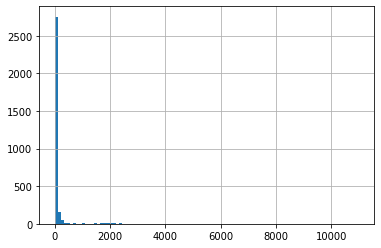

In [352]:
dataset['Height (m)'].hist(bins=100)

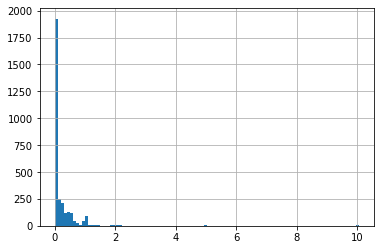

In [353]:
dataset['Weight (kg)'].hist(bins=100)

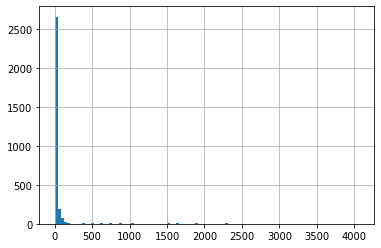

In [354]:
dataset['Width (m)'].hist(bins=100)

#**Visualization For Observing Relation and Outlier**


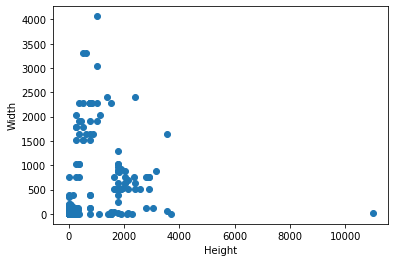

In [355]:
plt.scatter(x=dataset['Height (m)'],y=dataset['Width (m)'])
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

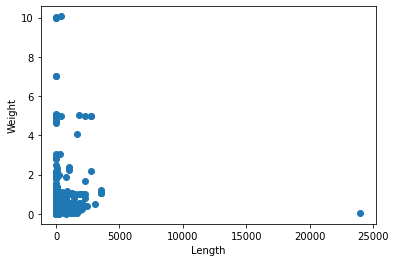

In [356]:
plt.scatter(x=dataset['Length (m)'],y=dataset['Weight (kg)'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

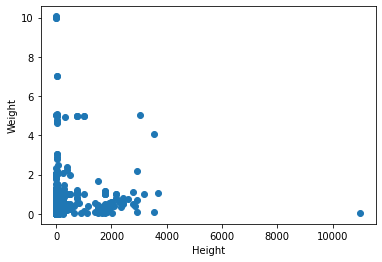

In [357]:
plt.scatter(x=dataset['Height (m)'],y=dataset['Weight (kg)'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

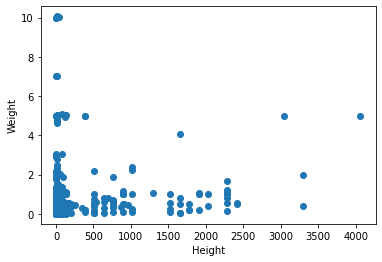

In [358]:
plt.scatter(x=dataset['Width (m)'],y=dataset['Weight (kg)'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# **Outlier detection and elimination** 
**Here interquartile range and upper bound has been used for detecting outlier and eliminating that**

In [359]:
dataset[dataset['Height (m)']>1]

,Product Id,Weight (kg),Length (m),Width (m),Height (m)
0,44331,1.0250,2286.0,1524.0,508.0
1,44352,0.5040,14.0,4.0,16.0
2,44373,0.4880,105.0,105.0,75.0
3,44394,1.0028,11.0,11.0,15.0
4,44415,0.5500,13.0,13.0,11.0
...,...,...,...,...,...
3051,129192,0.1780,105.0,105.0,35.0
3053,129234,0.0061,13.0,5.0,3.0
3054,129255,0.0114,6.0,3.0,16.0
3055,129276,0.3000,6.0,42.0,195.0


In [360]:
#Outlier detection
def upper_bound(name):
  q1=dataset[name].quantile(0.25)
  q2=dataset[name].quantile(0.75)
  print(q1,q2,q2-q1)
  lb=q1-(1.5*(q2-q1))
  ub=q2+(1.5*(q2-q1))
  print(lb,ub)
  return ub

In [361]:
ub_h=upper_bound('Height (m)')
ub_wei=upper_bound('Weight (kg)')
ub_wid=upper_bound('Width (m)')
ub_len=upper_bound('Length (m)')

0.0 16.0 16.0
-24.0 40.0
0.0 0.256 0.256
-0.384 0.64
0.0 11.0 11.0
-16.5 27.5
0.0 15.0 15.0
-22.5 37.5


In [362]:
dataset.loc[dataset['Height (m)']>ub_h,'Height (m)']=ub_h
dataset.loc[dataset['Width (m)']>ub_h,'Width (m)']=ub_wid
dataset.loc[dataset['Weight (kg)']>ub_h,'Weight (kg)']=ub_wei
dataset.loc[dataset['Length (m)']>ub_h,'Length (m)']=ub_len

In [363]:
#Now we will be start talking about null values
index=dataset['Height (m)'].isna()
print(dataset[index==True])

      Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
94         46305        1.004        26.0       19.0         NaN
157        47628        0.144         6.0        5.0         NaN
381        52332        1.900         1.0        1.0         NaN
3019      128520        0.454         7.0        4.0         NaN


In [364]:
med=dataset['Height (m)'].median()
print(med)

0.5


**Change of dataset value can be observed due to outlier processing here**

In [365]:
dataset[dataset['Height (m)']>1]

,Product Id,Weight (kg),Length (m),Width (m),Height (m)
0,44331,1.0250,37.5,27.5,40.0
1,44352,0.5040,14.0,4.0,16.0
2,44373,0.4880,37.5,27.5,40.0
3,44394,1.0028,11.0,11.0,15.0
4,44415,0.5500,13.0,13.0,11.0
...,...,...,...,...,...
3051,129192,0.1780,37.5,27.5,35.0
3053,129234,0.0061,13.0,5.0,3.0
3054,129255,0.0114,6.0,3.0,16.0
3055,129276,0.3000,6.0,27.5,40.0


**Note: Here Median is more convenient and should be used and could also be used for empty filling but for empty values of height filling with mean value makes coherency between length,weight,height that's why it was used** **Another reason of using mean was to avoid more null values**

In [366]:
dataset['Height (m)']=dataset['Height (m)'].fillna(dataset['Height (m)'].mean())
print(dataset[index==True])

      Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
94         46305        1.004        26.0       19.0    9.748199
157        47628        0.144         6.0        5.0    9.748199
381        52332        1.900         1.0        1.0    9.748199
3019      128520        0.454         7.0        4.0    9.748199


In [367]:
index=dataset['Width (m)'].isna()
print(dataset[dataset['Width (m)'].isna()])

     Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
236       49287        0.278        13.0        NaN        13.0
614       57225        0.766        22.0        NaN         2.0


In [368]:
dataset['Width (m)']=dataset['Width (m)'].fillna(dataset['Width (m)'].mean())
print(dataset[dataset['Width (m)'].isna()])
print(dataset[index])

Empty DataFrame
Columns: [Product Id, Weight (kg), Length (m), Width (m), Height (m)]
Index: []
     Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
236       49287        0.278        13.0   7.125982        13.0
614       57225        0.766        22.0   7.125982         2.0


In [369]:
index=dataset['Weight (kg)'].isna()
print(dataset[dataset['Weight (kg)'].isna()])

     Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
33        45024          NaN        37.5       27.5        40.0
122       46893          NaN        16.0       12.0         3.0
188       48279          NaN        14.0        9.0        40.0
424       53235          NaN         8.0        8.0        40.0


In [370]:
dataset['Weight (kg)']=dataset['Weight (kg)'].fillna(dataset['Weight (kg)'].mean())
print(dataset[dataset['Weight (kg)'].isna()])
print(dataset[index])

Empty DataFrame
Columns: [Product Id, Weight (kg), Length (m), Width (m), Height (m)]
Index: []
     Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
33        45024      0.23737        37.5       27.5        40.0
122       46893      0.23737        16.0       12.0         3.0
188       48279      0.23737        14.0        9.0        40.0
424       53235      0.23737         8.0        8.0        40.0


In [371]:
index=dataset['Length (m)'].isna()
print(dataset[dataset['Length (m)'].isna()])

     Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
46        45297        0.022         NaN       16.0         7.0
284       50295        0.000         NaN        0.0         0.0
285       50316        0.005         NaN        9.0         3.0
353       51744        0.000         NaN        0.0         0.0
552       55923        0.012         NaN        1.0         2.0


In [372]:
dataset['Length (m)']=dataset['Length (m)'].fillna(dataset['Length (m)'].mean())#Median can also be used produces zero that's why ignored
print(dataset[dataset['Length (m)'].isna()])
print(dataset[index])

Empty DataFrame
Columns: [Product Id, Weight (kg), Length (m), Width (m), Height (m)]
Index: []
     Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
46        45297        0.022    9.696037       16.0         7.0
284       50295        0.000    9.696037        0.0         0.0
285       50316        0.005    9.696037        9.0         3.0
353       51744        0.000    9.696037        0.0         0.0
552       55923        0.012    9.696037        1.0         2.0


In [373]:
dataset.head(20)

,Product Id,Weight (kg),Length (m),Width (m),Height (m)
0,44331,1.0250,37.5,27.5,40.0
1,44352,0.5040,14.0,4.0,16.0
2,44373,0.4880,37.5,27.5,40.0
3,44394,1.0028,11.0,11.0,15.0
4,44415,0.5500,13.0,13.0,11.0
5,44436,0.0450,8.0,8.0,26.0
6,44457,0.2240,15.0,13.0,3.0
7,44478,0.2460,13.0,3.0,14.0
8,44499,2.0030,36.0,26.0,4.0
9,44520,1.0018,28.0,21.0,5.0


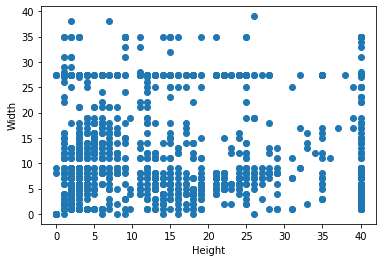

In [374]:
plt.scatter(x=dataset['Height (m)'],y=dataset['Width (m)'])
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

**In this particular set 0 values came always as a set(height,weight,length,width) that's why I haven't replaced them but they could be replaced with mean/median/arbitary values**